In [1]:
from resolved_pol import ResolvedPol

In [2]:
object = "W0220+0137"
band = "R_SPECIAL"
mjds = [60201, 60207, "All"]

#Star far from target, only used for seeing but not for position offsets. Assume the ones from W0204-0506.
star_ex_ref = 1600
star_ey_ref = 262

#We'll use the source itself for pointing offsets. 
source_ex_ref =  1021.5
source_ey_ref = 70.0

mkdir: stamps: File exists


-0.1 -90.6


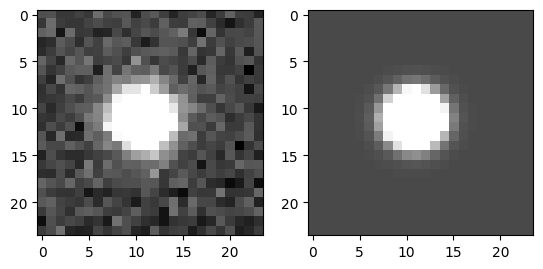

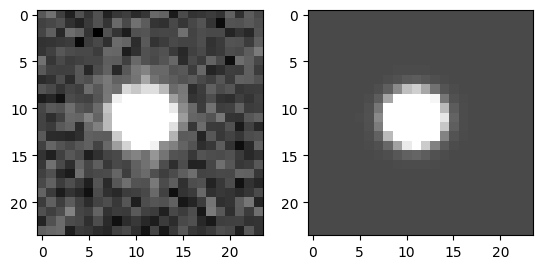

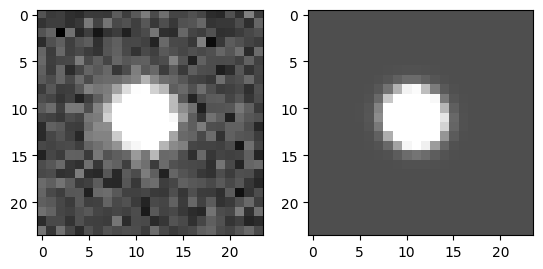

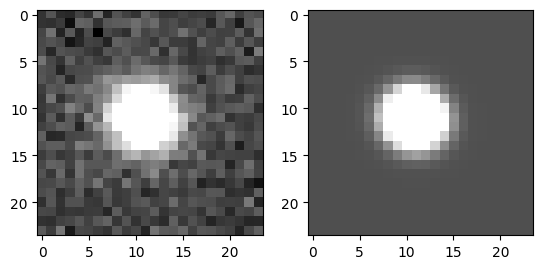

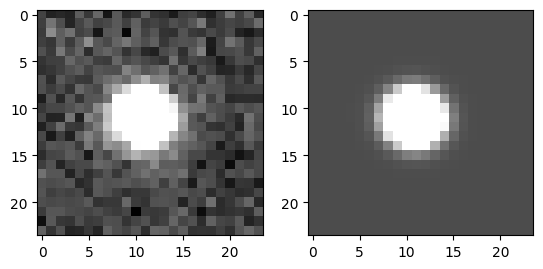

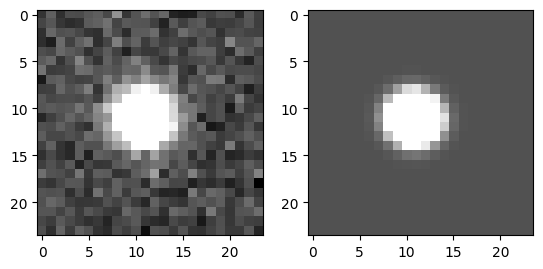

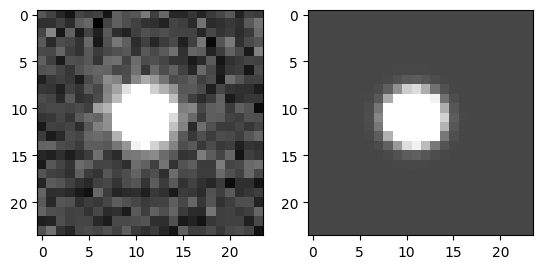

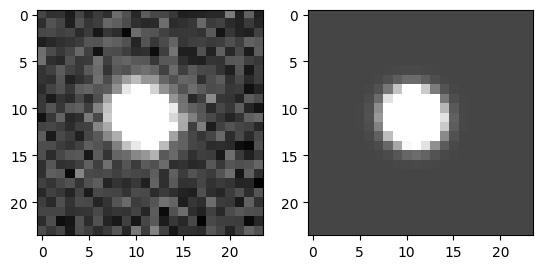

[0.95286118 0.82065301 0.85320048 1.051098   0.95213068 0.83989374
 0.82682457 0.87063407]
Target FWHM:  1.1
0.926158167597404 0.2333918582345458


Target FWHM:  1.1
1.2343496180503857 0.3110561037486972


Target FWHM:  1.1
1.170003882881302 0.2948409784860881


Target FWHM:  1.1
0.5465565807877345 0.1377322583585091


Target FWHM:  1.1
0.9282891511748425 0.2339288660960603


Target FWHM:  1.1
1.1970329566697466 0.3016523050807762


Target FWHM:  1.1
1.222597888455998 0.3080946678909115


Target FWHM:  1.1
1.1329459263469575 0.2855023734394333


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.7


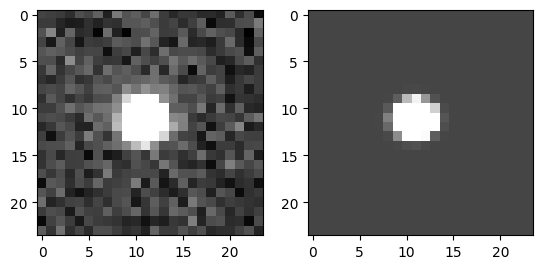

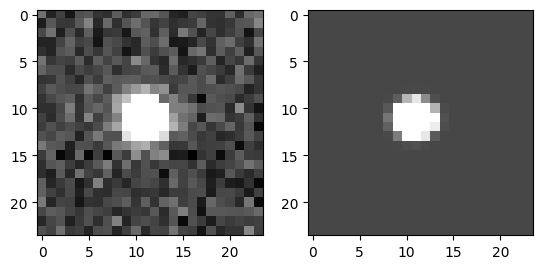

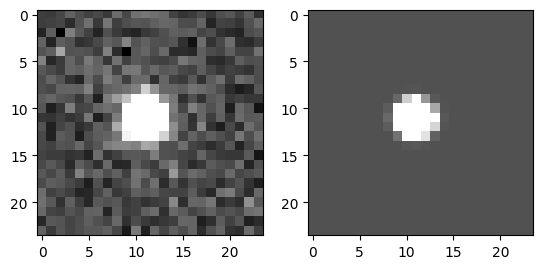

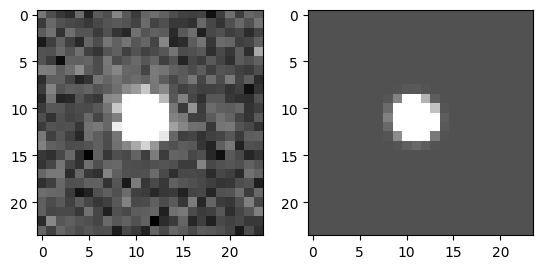

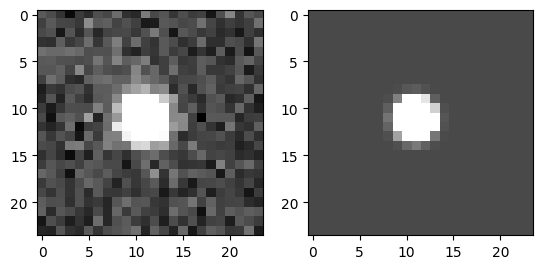

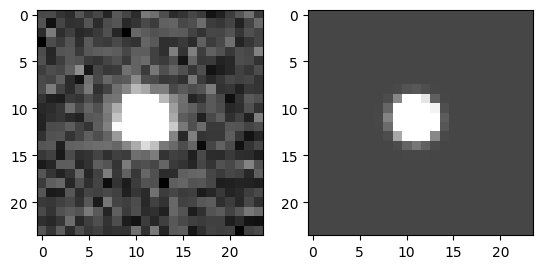

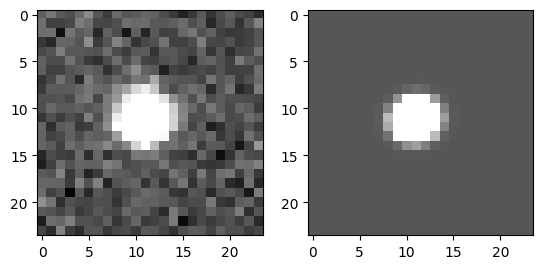

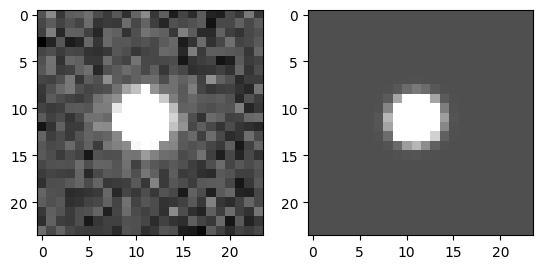

[0.52160054 0.50712591 0.4934388  0.53041027 0.55311728 0.56477152
 0.62256926 0.65662989]
Target FWHM:  0.7
0.7866890695268505 0.19824564552076632


Target FWHM:  0.7
0.8131206122173327 0.20490639427876783


Target FWHM:  0.7
0.8366931049102412 0.2108466624373808


Target FWHM:  0.7
0.7697797438724332 0.19398449545585317


Target FWHM:  0.7
0.7229744520013286 0.1821895619043348


Target FWHM:  0.7
0.696918277817586 0.17562340601003168


Target FWHM:  0.7
0.5392717174948559 0.1358964728087037


Target FWHM:  0.7
0.4087593368824793 0.10300735289438478


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.6


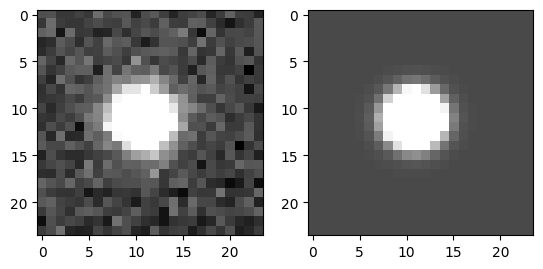

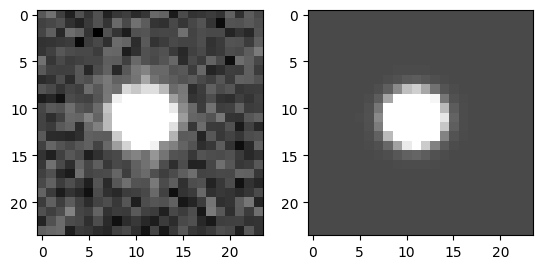

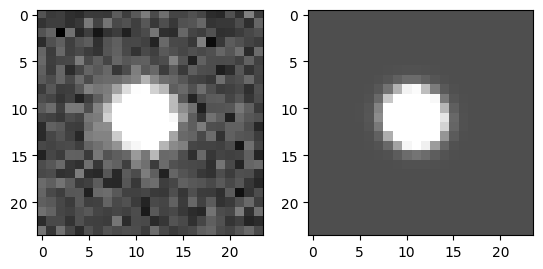

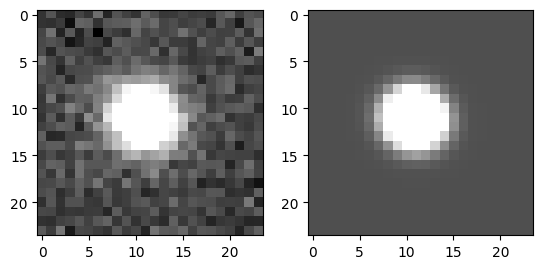

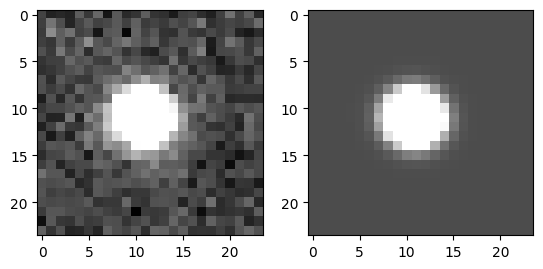

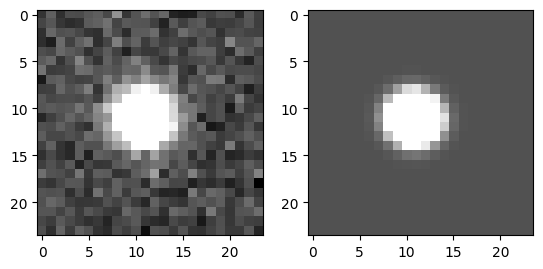

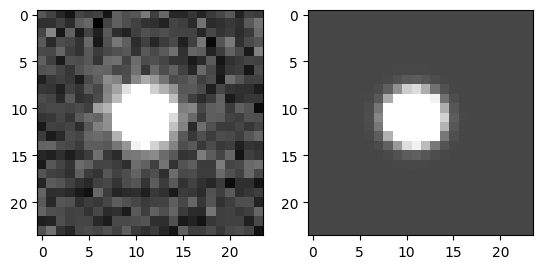

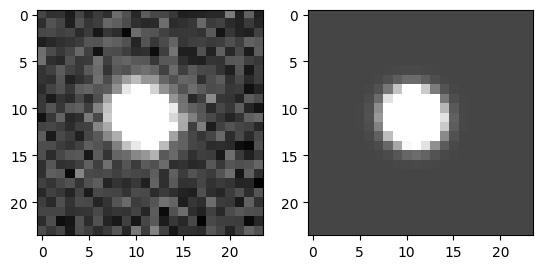

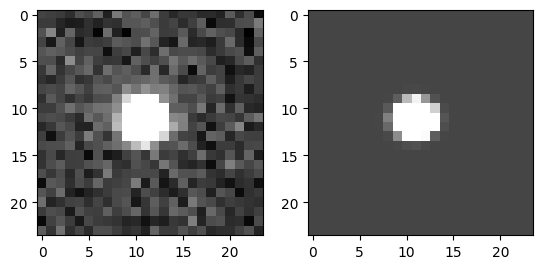

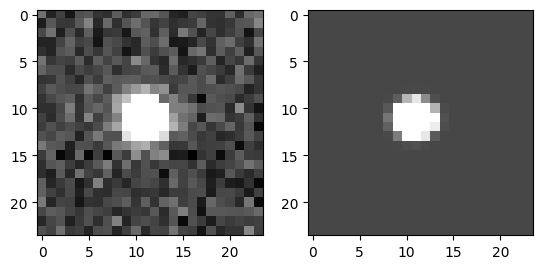

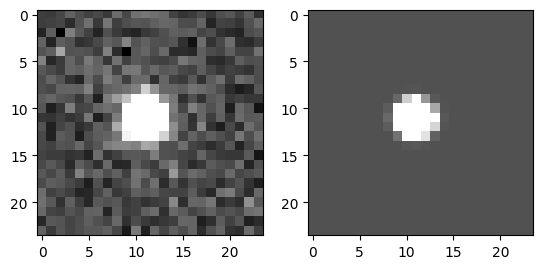

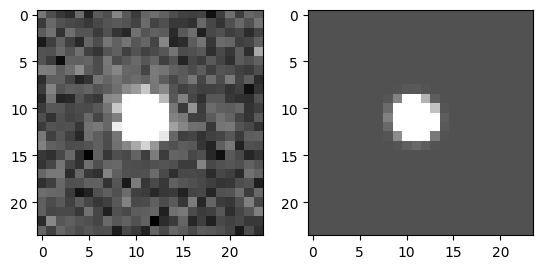

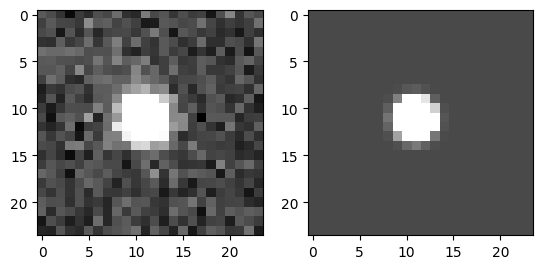

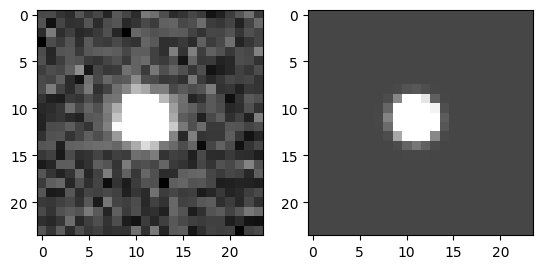

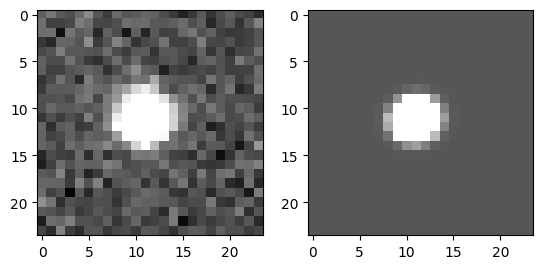

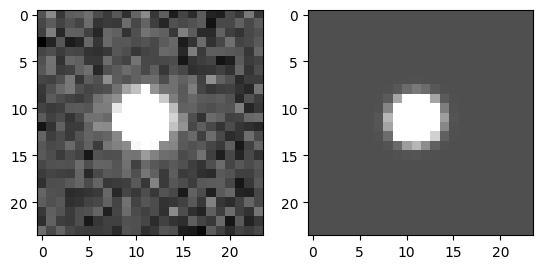

[0.95286118 0.82065301 0.85320048 1.051098   0.95213068 0.83989374
 0.82682457 0.87063407 0.52160054 0.50712591 0.4934388  0.53041027
 0.55311728 0.56477152 0.62256926 0.65662989]
Target FWHM:  1.1
0.926158167597404 0.2333918582345458


Target FWHM:  1.1
1.2343496180503857 0.3110561037486972


Target FWHM:  1.1
1.170003882881302 0.2948409784860881


Target FWHM:  1.1
0.5465565807877345 0.1377322583585091


Target FWHM:  1.1
0.9282891511748425 0.2339288660960603


Target FWHM:  1.1
1.1970329566697466 0.3016523050807762


Target FWHM:  1.1
1.222597888455998 0.3080946678909115


Target FWHM:  1.1
1.1329459263469575 0.2855023734394333


Target FWHM:  1.1
1.632028039292613 0.41127106590173845


Target FWHM:  1.1
1.6449319010028831 0.4145228390527265


Target FWHM:  1.1
1.6567109526796182 0.41749116007526377


Target FWHM:  1.1
1.6239447906257705 0.40923408723769417


Target FWHM:  1.1
1.6022883283513272 0.40377665874453444


Target FWHM:  1.1
1.5907013908589187 0.40085675049644753


Target FWHM:  1.1
1.5282178556129098 0.3851108996144533


Target FWHM:  1.1
1.48718526902766 0.3747706877949703


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)


In [3]:
rpos = list()
for mjd in mjds:
    rpo = ResolvedPol(object=object, band=band, mjd=mjd)
    rpo.find_shift(ex_ref=source_ex_ref, ey_ref=source_ey_ref)
    print(rpo.dx_use, rpo.dy_use)

    rpo.find_seeing(ex_ref=star_ex_ref, ey_ref=star_ey_ref, stddev_0=1.8, show_plots=True)
    print(rpo.seeing)

    rpo.get_pol(regularize_psf=True)

    rpos.append(rpo)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

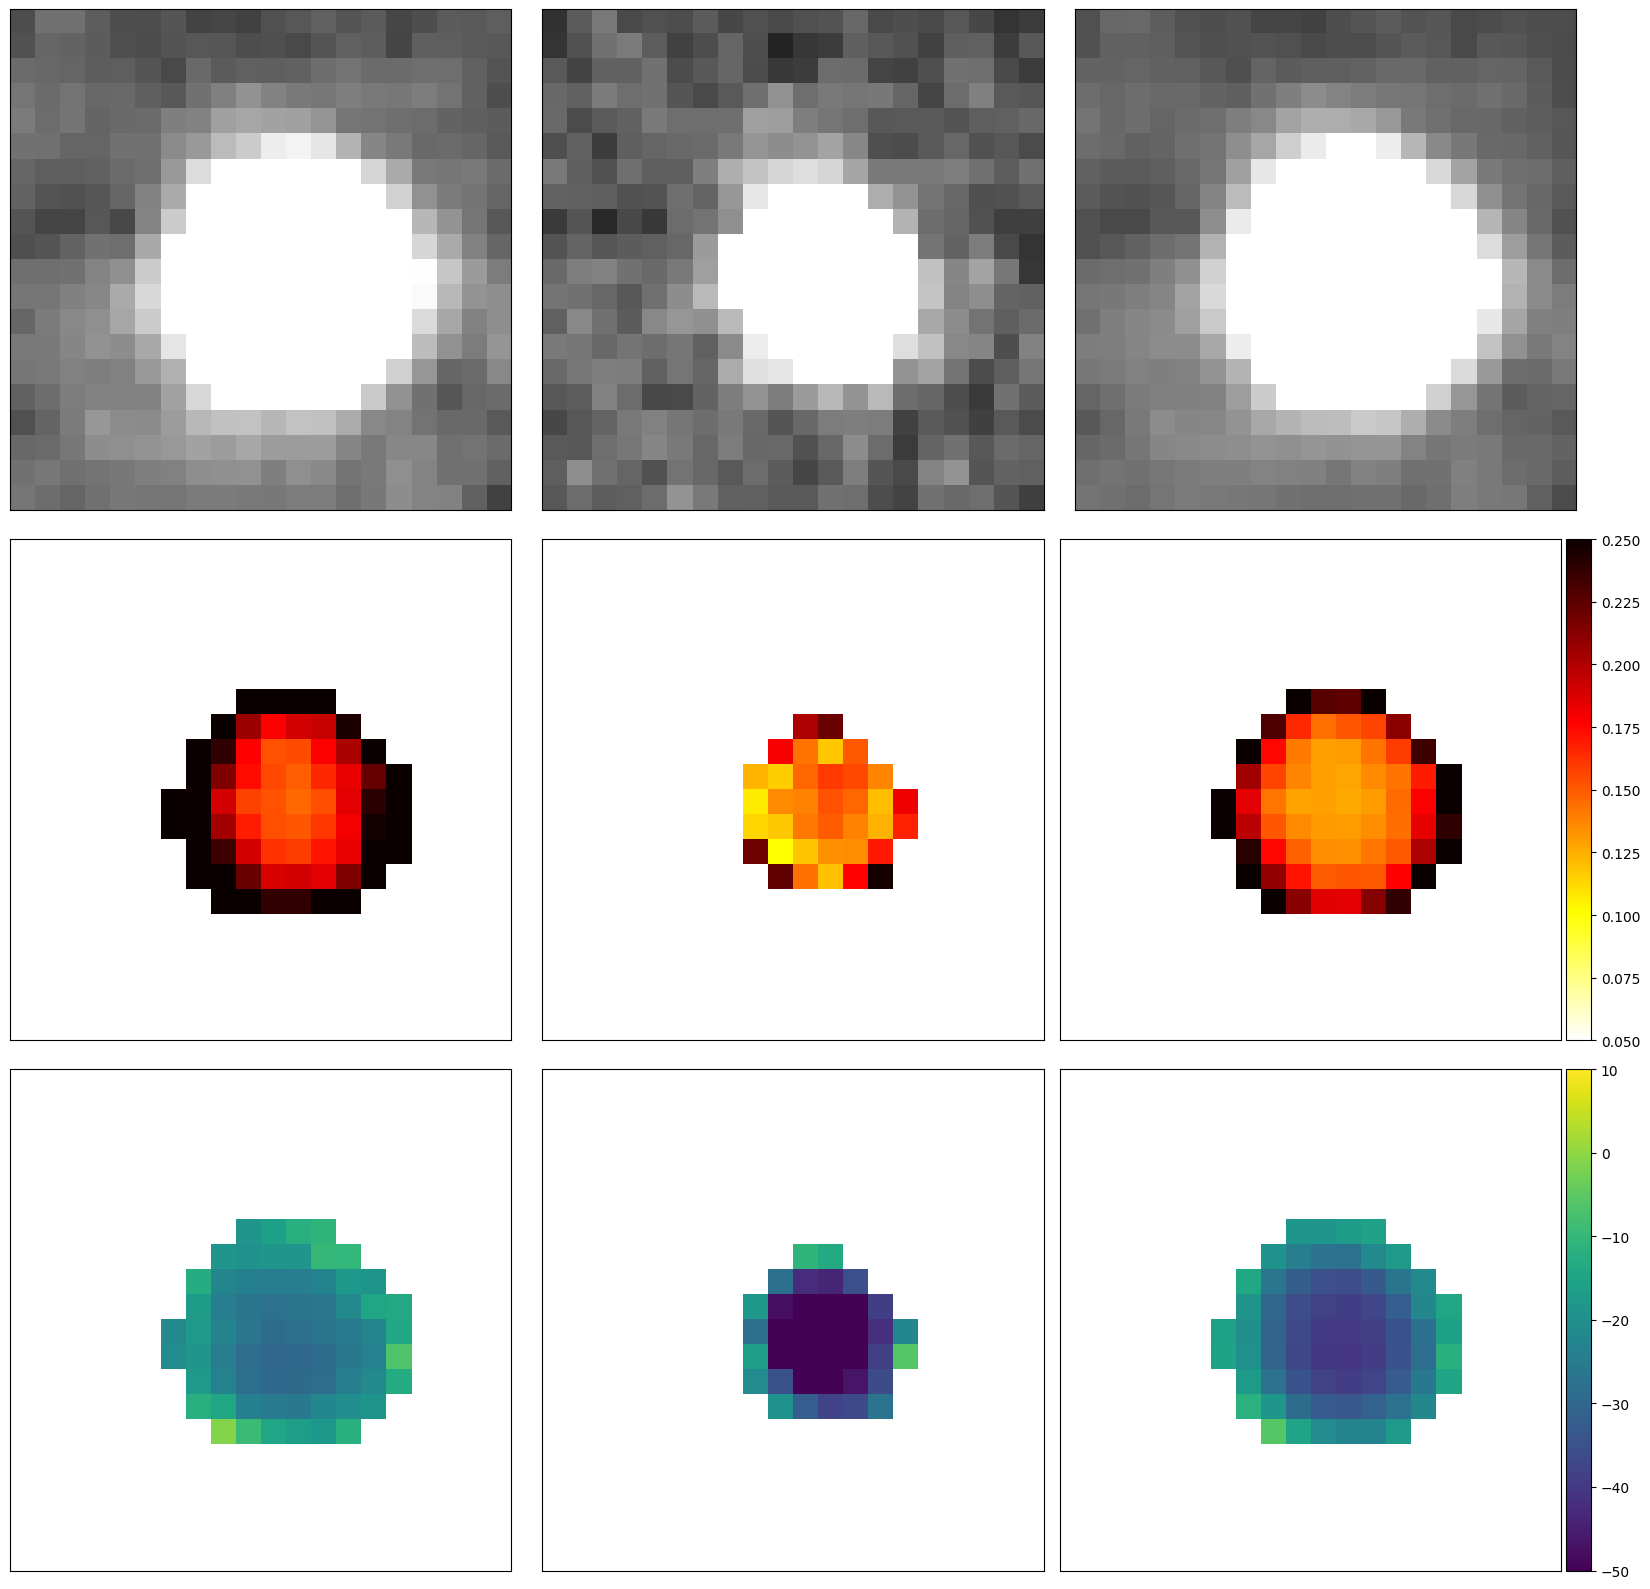

In [5]:
fig, axs = plt.subplots(3,3,figsize=(17,16), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])


stack1 = rpos[0].stack[1]
size = 20
ix1 = int(rpos[0].stack.shape[1]/2 - size/2)
ix2 = int(rpos[0].stack.shape[1]/2 + size/2)
iy1 = int(rpos[0].stack.shape[0]/2 + size/2)
iy2 = int(rpos[0].stack.shape[0]/2 - size/2)
#print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(rpos[0].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,0].imshow(rpos[0].stack[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

norm2 = ImageNormalize(rpos[1].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,1].imshow(rpos[1].stack[iy1:iy2:-1,ix1:ix2], norm=norm2, cmap='gray')

norm3 = ImageNormalize(rpos[2].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,2].imshow(rpos[2].stack[iy1:iy2:-1,ix1:ix2], norm=norm3, cmap='gray')

axs[1,0].imshow(rpos[0].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.25)
axs[1,1].imshow(rpos[1].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.25)
cm_pf = axs[1,2].imshow(rpos[2].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.25)
divider_pf = make_axes_locatable(axs[1,2])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

axs[2,0].imshow(rpos[0].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
axs[2,1].imshow(rpos[1].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
cm_pa = axs[2,2].imshow(rpos[2].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
divider_pa = make_axes_locatable(axs[2,2])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

fig.tight_layout()
plt.show()